In [1]:
from psg import PSG
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import pandas as pd
import constants
from ecg import ECG
from emg import EMG
from eeg import EEG
from eog import EOG
from sao2 import *

In [2]:
# Create PSG objects for each individual's PSG to analayze
psg_data = PSG("n3")

Extracting EDF parameters from c:\Users\bryce\Documents\projects\psg_project\n3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [23]:
# Create EEG object
import eeg
reload(eeg)
EEG_N3 = eeg.EEG(psg_data.data)

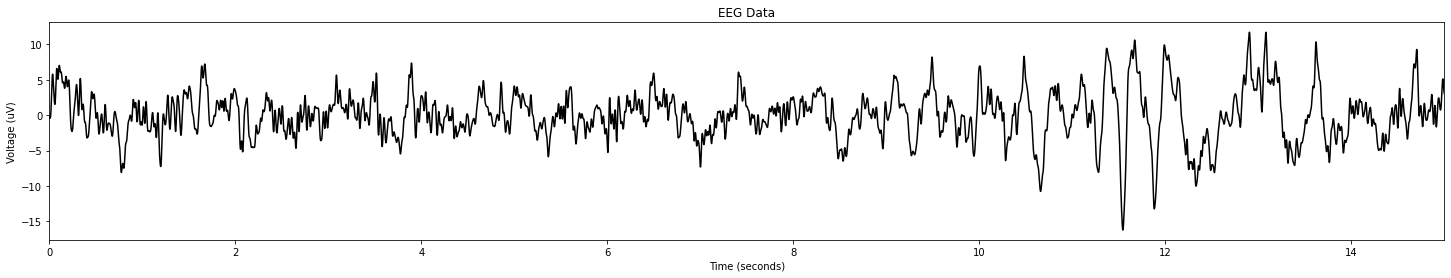

In [8]:
# Example of reading EEG Data with epoch range
vector = EEG_N3.get_eeg_vector_epoch(240, 'F4-C4')
EEG_N3.plot_eeg(vector[0:constants.FREQUENCY*15])

In [24]:
# Example of EEG feature extraction
EEG_N3.extract_features()
EEG_N3.eeg_features.head()

In [3]:
# Create EOG dataframe
eog_data = EOG(psg_data.data).get_EOG_metrics()

c:\Users\bryce\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 1048576 is greater than input length  = 15360, using nperseg = 15360
  warnings.warn('nperseg = {0:d} is greater than input length '


In [3]:
# Create ECG object:
ecgDfInput = psg_data.data.loc[400000:600000, ["epoch", "ECG1-ECG2"]]
ecgN3 = ECG(ecgDfInput)

c:\Users\andre\OneDrive\Desktop\CS4641\Project\PSG_Project\PSG_Project_Venv\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


In [4]:
# Functions for getting raw ECG data:
rawDataEpoch1 = ecgN3.getRawDataByEpoch(26)
display(rawDataEpoch1)

rawDataTime1 = ecgN3.getRawDataByTime(800, 1)
display(rawDataTime1)

# ECG Feature extraction:
metrics1 = ecgN3.getMetrics()
display(metrics1)

,epoch,ECG1-ECG2
400000,26.0,0.000027
400001,26.0,0.000027
400002,26.0,0.000027
400003,26.0,0.000027
400004,26.0,0.000026
...,...,...
414715,26.0,0.000015
414716,26.0,0.000015
414717,26.0,0.000015
414718,26.0,0.000015


,epoch,ECG1-ECG2
409600,26.0,0.000021
409601,26.0,0.000021
409602,26.0,0.000021
409603,26.0,0.000020
409604,26.0,0.000020
...,...,...
410108,26.0,0.000018
410109,26.0,0.000018
410110,26.0,0.000018
410111,26.0,0.000018


,epoch,bpm_ECG1-ECG2,bpm_norm_ECG1-ECG2,rmssd_ECG1-ECG2,rmssd_norm_ECG1-ECG2,lf_ECG1-ECG2,lf_norm_ECG1-ECG2,hf_ECG1-ECG2,hf_norm_ECG1-ECG2,lf/hf_ECG1-ECG2,lf/hf_norm_ECG1-ECG2,breathingrate_ECG1-ECG2,breathingrate_norm_ECG1-ECG2
0,26,59.114496,0.998250,31.889138,0.973683,578.507314,0.811327,298.200327,0.880932,1.939996,0.963630,0.3,1.0
1,27,59.020897,0.996670,31.960010,0.975847,1015.720939,1.424497,390.008462,1.152148,2.604356,1.293630,0.3,1.0
2,28,59.139838,0.998678,32.672803,0.997611,1146.735420,1.608238,418.966476,1.237695,2.737058,1.359545,0.3,1.0
3,29,59.218310,1.000003,33.075033,1.009892,813.262119,1.140559,367.022567,1.084244,2.215837,1.100645,0.3,1.0
4,30,59.305504,1.001476,33.249049,1.015206,427.664165,0.599777,294.097433,0.868812,1.454158,0.722306,0.3,1.0
5,31,59.509580,1.004922,33.660267,1.027761,296.339058,0.415601,262.737139,0.776168,1.127892,0.560244,0.3,1.0


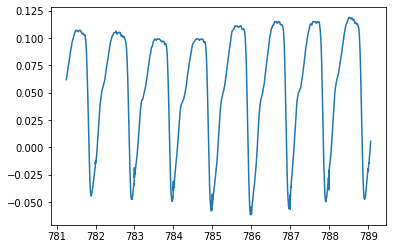

In [5]:
# Create ECG object using Pleth (PPG) signal:
plethSample = psg_data.data.loc[400000:404000, ["elapsed_seconds", "epoch", "PLETH"]]
#ecgN3 = ECG(plethDfInput)
plt.plot(plethSample['elapsed_seconds'], plethSample['PLETH'])
#ecgN3 = ECG(plethDfInput)

In [6]:
plethDfInput = psg_data.data.loc[400000:600000, ["elapsed_seconds", "epoch", "PLETH"]]
plethN3 = ECG(plethDfInput, signalType = 'PLETH')

# ECG Feature extraction:
metricsPleth = plethN3.getMetrics()
display(metricsPleth)

c:\Users\andre\OneDrive\Desktop\CS4641\Project\PSG_Project\PSG_Project_Venv\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\andre\OneDrive\Desktop\CS4641\P

,epoch,bpm_PLETH,bpm_norm_PLETH,rmssd_PLETH,rmssd_norm_PLETH,lf_PLETH,lf_norm_PLETH,hf_PLETH,hf_norm_PLETH,lf/hf_PLETH,lf/hf_norm_PLETH,breathingrate_PLETH,breathingrate_norm_PLETH
0,26,59.849805,0.999859,114.389740,0.967444,1518.710647,1.027712,2084.413420,0.794758,0.728603,1.236323,0.300000,1.200000
1,27,59.813084,0.999246,103.291180,0.873578,2208.920591,1.494777,2494.766905,0.951220,0.885422,1.502419,0.100000,0.400000
2,28,59.730630,0.997868,112.421404,0.950797,1947.338085,1.317764,2619.051444,0.998608,0.743528,1.261648,0.300000,1.200000
3,29,59.861766,1.000059,117.617344,0.994741,1183.392912,0.800802,2165.196638,0.825559,0.546552,0.927412,0.266667,1.066667
4,30,59.969246,1.001855,126.833173,1.072683,819.846008,0.554790,2561.074901,0.976502,0.320118,0.543189,0.233333,0.933333
5,31,59.924842,1.001113,134.882102,1.140757,1188.344660,0.804153,3811.712413,1.453353,0.311761,0.529009,0.300000,1.200000


In [3]:
# Create EMG Object:
emgDfInput = psgN3.data.loc[:, ["elapsed_seconds", "epoch", "EMG1-EMG2"]]
emgN3 = EMG(emgDfInput)

In [4]:
# EMG Feature Extraction:
metrics_emg = emgN3.getMetrics()
display(metrics_emg)

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,0,4.777495e-06,12.201508,3.431867e-06,8.764836
1,1,2.291293e-07,0.585186,4.646428e-08,0.118668
2,2,2.076511e-07,0.530332,5.028354e-08,0.128422
3,3,2.836140e-07,0.724337,5.078629e-08,0.129706
4,4,2.420611e-07,0.618213,4.686139e-08,0.119682
...,...,...,...,...,...
996,996,5.457533e-06,13.938296,1.821842e-06,4.652903
997,997,6.020462e-06,15.375992,3.169756e-06,8.095416
998,998,3.802387e-06,9.711128,3.239604e-06,8.273804
999,999,9.626694e-06,24.586146,4.869794e-06,12.437238


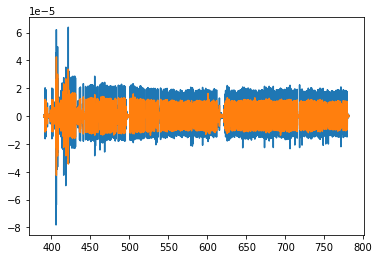

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,13,1.381521e-07,2.704877,6.305217e-08,1.234497
1,14,6.942441e-08,1.359259,3.369478e-08,0.659709
2,15,5.255351e-08,1.028944,1.210005e-08,0.236907
3,16,4.381848e-08,0.857921,1.044845e-08,0.204570
4,17,4.138564e-08,0.810288,8.802990e-09,0.172354
5,18,3.902929e-08,0.764153,7.430436e-09,0.145480
6,19,4.082604e-08,0.799332,7.900779e-09,0.154689
7,20,3.042755e-08,0.595740,7.759363e-09,0.151920
8,21,4.444623e-08,0.870211,8.156121e-09,0.159688
9,22,4.287758e-08,0.839499,8.283091e-09,0.162174


In [22]:
dxDfInput = psgN3.data.loc[200000:400000, ["elapsed_seconds", "epoch", "DX1-DX2"]]
dxN3 = EMG(dxDfInput, signalType = "DX1-DX2")

seconds = dxN3.emgData["elapsed_seconds"]
DX = dxN3.emgData["filtered"]
plt.plot(seconds, dxN3.emgData["DX1-DX2"])
plt.plot(seconds, DX)
plt.show()

metricsDx = dxN3.getMetrics()
display(metricsDx)

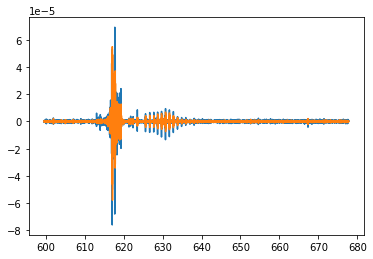

,epoch,EMG_epochEnergy,EMG_epochEnergy_norm,EMG_5Highest5Sec,EMG_5Highest5Sec_norm
0,20,1.397612e-07,2.936869,1.233448e-07,1.728040
1,21,2.995734e-09,0.062951,2.266161e-09,0.031749


In [32]:
sxDfInput = psgN3.data.loc[307000:347000, ["elapsed_seconds", "epoch", "SX1-SX2"]]
sxN3 = EMG(sxDfInput, signalType = "SX1-SX2")

seconds = sxN3.emgData["elapsed_seconds"]
SX = sxN3.emgData["filtered"]
plt.plot(seconds, sxN3.emgData["SX1-SX2"])
plt.plot(seconds, SX)
plt.show()

metricsSx = sxN3.getMetrics()
display(metricsSx)

In [6]:
oxyData = psg_data.data[['epoch','SAO2']]
sao2 = SAO2(oxyData).get_SAO2_metrics()
sao2

,epoch,SAO2_min,SAO2_avg,above80,above90,above70
0.0,0,97.019913,97.753974,1.000000,1.000000,1.000000
1.0,1,97.019913,97.987538,1.000000,1.000000,1.000000
2.0,2,98.020905,98.020905,1.000000,1.000000,1.000000
3.0,3,98.020905,98.020905,1.000000,1.000000,1.000000
4.0,4,98.020905,98.020905,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
997.0,997,95.017929,97.553775,1.000000,1.000000,1.000000
998.0,998,98.020905,98.187737,1.000000,1.000000,1.000000
999.0,999,0.050355,78.159864,0.800000,0.800000,0.800000
1000.0,1000,0.050355,71.428295,0.733333,0.733333,0.733333
